### 伪随机数生成
numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成`多种概率分布`的样本值的函数。如下：

In [18]:
samples = np.random.normal(size = (4,4))

In [19]:
samples

array([[ 0.79575632,  0.6952795 , -0.4667241 , -0.35462315],
       [-0.79189604, -0.04394413,  0.10390778, -1.18859107],
       [ 0.12606027,  0.73113933,  0.33346507, -0.29562742],
       [-2.06527112,  0.83437652,  0.08950446, -0.21639724]])

而Python内置的random一次只能生成一个样本值。下面对两种方法进行性能测试，可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级：

In [20]:
from random import normalvariate

N = 1000000

In [22]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

2.14 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit np.random.normal(size = N)

64.4 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


之所以这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。我们可以通过numpy.random.seed更改随机数生成种子：

In [24]:
np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，可以使用numpy.random.RandomState，创建一个与其他隔离的随机数生成器：

In [25]:
myrand = np.random.RandomState(1234)

In [26]:
myrand.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

下面列出numpy.random中的部分函数：
![](https://github.com/JazzZhao/jazznote/blob/master/%E8%AF%BB%E4%B9%A6%E7%AC%94%E8%AE%B0%E4%B9%8B%E2%80%9C%E5%88%A9%E7%94%A8Python%E8%BF%9B%E8%A1%8C%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E2%80%9D/image/15777037-27e056e10e7abb49.png)
![](https://github.com/JazzZhao/jazznote/blob/master/%E8%AF%BB%E4%B9%A6%E7%AC%94%E8%AE%B0%E4%B9%8B%E2%80%9C%E5%88%A9%E7%94%A8Python%E8%BF%9B%E8%A1%8C%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E2%80%9D/image/15777037-27fa99d66a938e95.png)

### 随机漫步
下面通过内置的`random`模块以纯Python的方式实现1000步的随机漫步：

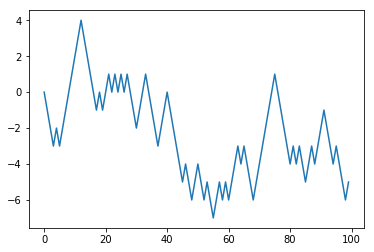

In [14]:
import numpy as np

import matplotlib.pyplot as plt

import random

position = 0
walk = [position]
steps = 1000;
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

不难看出，这其实是随机漫步中各步的累计和，可以用一个数组运算来实现，这里用np.random模块一次性随机产生1000个“掷硬币”结果，将其分别设置为1或-1,然后累计和：

In [15]:
nstep = 1000

draws = np.random.randint(0,2, size = nstep)

steps = np.where(draws>0, 1, -1)

walk = np.cumsum(steps)

有了这些数据，就可以沿着漫步路径做一些统计工作了，比如求最大值和最小值

In [16]:
walk.min()

-50

In [17]:
walk.max()

7